In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection
from sklearn import ensemble
from scipy.special import comb

In [2]:
# 常见参数




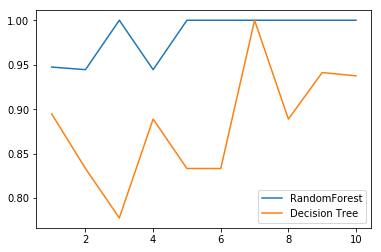

In [3]:
# n_estimators
wine = datasets.load_wine()

clf = tree.DecisionTreeClassifier()
clf_s = model_selection.cross_val_score(clf,wine.data,wine.target,cv=10)

rfc = ensemble.RandomForestClassifier(n_estimators=25) #25颗树
rfc_s = model_selection.cross_val_score(rfc,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()  

In [4]:
# random_state
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

wine = datasets.load_wine()

Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(wine.data,wine.target,test_size=0.3)

rfc = ensemble.RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [5]:
# bootstrap & oob_score
#无需划分训练集和测试集

rfc = ensemble.RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
#重要属性oob_score_
rfc.oob_score_

0.9662921348314607

In [6]:
# 重要属性和接口




In [7]:
rfc = ensemble.RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
print(rfc.score(Xtest,Ytest))
print()
print(rfc.feature_importances_)
print()
print(rfc.apply(Xtest))
print()
print(rfc.predict(Xtest))
print()
print(rfc.predict_proba(Xtest))

0.9814814814814815

[0.11928348 0.03633007 0.01462839 0.0361321  0.03463215 0.08103865
 0.14198295 0.0245891  0.00944136 0.13137371 0.05806685 0.11038487
 0.20211633]

[[11 20 13 ... 17  9 16]
 [ 7 15 17 ...  8  2  8]
 [ 9 10 19 ...  4  2  4]
 ...
 [11 20 13 ... 17  9 16]
 [11 20 13 ... 17  9 14]
 [11 20 12 ... 17  2 16]]

[0 1 1 1 1 2 2 0 2 2 1 0 2 1 0 0 2 2 0 1 1 1 2 1 0 1 0 0 0 1 2 0 0 1 0 0 2
 0 2 1 1 2 0 0 0 2 2 0 1 1 1 0 0 0]

[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.04 0.84 0.12]
 [0.   1.   0.  ]
 [0.04 0.96 0.  ]
 [0.   0.   1.  ]
 [0.   0.16 0.84]
 [0.96 0.04 0.  ]
 [0.12 0.08 0.8 ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.6  0.32 0.08]
 [0.   0.   1.  ]
 [0.08 0.92 0.  ]
 [1.   0.   0.  ]
 [0.88 0.12 0.  ]
 [0.08 0.32 0.6 ]
 [0.   0.08 0.92]
 [0.92 0.08 0.  ]
 [0.08 0.92 0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.96 0.04 0.  ]
 [0.08 0.92 0.  ]
 [0.92 0.08 0.  ]
 [0.96 0.04 0.  ]
 [0.8  0.2  0.  ]
 [0.   0.8  0.2 ]
 [0.08 0.24 0.68]
 [1. 

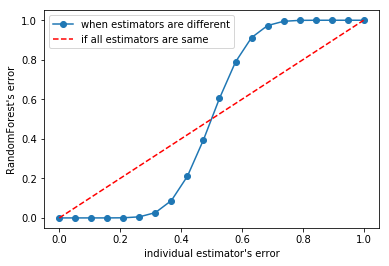

In [8]:
# Bonus：Bagging的另一个必要条件
import numpy as np

x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()
'''
当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比基分类器要好的。相反，
当基分类器的误差率大于0.5，袋装的集成算法就失效了。所以在使用随机森林之前，一定要检查，用来组成随机
森林的分类树们是否都有至少50%的预测正确率。

'''